In [1]:
from utils import load_and_process_csv,load_config
df = load_and_process_csv('/home/vet-ai/ai_projects/skin-lesion-project/Data/exports/export_csv/export_data_24-11-07-16-53-25.csv')

In [2]:
config = load_config()

In [ ]:
import matplotlib.pyplot as plt

import torchvision
 
def show_batch(images, labels=None, label_map=None, n=8):

    images = images[:n]

    images = torchvision.utils.make_grid(images, nrow=n, padding=2, normalize=True).permute(1, 2, 0)

    plt.figure(figsize=(n * 2, 2))

    plt.imshow(images.cpu())

    plt.axis('off')

    plt.title("Augmented Image Batch")

    plt.show()
 
    if labels is not None and label_map:

        class_names = list(label_map.keys())

        label_indices = labels[:n].argmax(dim=1).tolist()

        print("Labels:")

        print([class_names[i] for i in label_indices])

 

 not using weighted dataloader


/home/vet-ai/ai_projects/skin-lesion-project/venkatraj-venkatesh/.venv/lib/python3.11/site-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


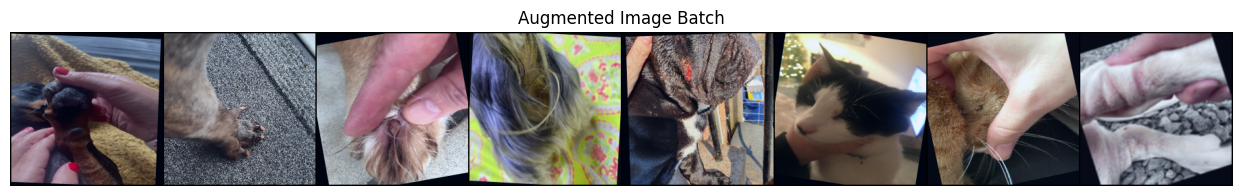

Labels:
[0, 1, 0, 1, 0, 0, 0, 0]


In [6]:
from dataloaders import get_dataloaders
train_loader, _ = get_dataloaders(df, config)
 
# Get label_map with reverse mapping for display
label_map = config["label_map"]
reverse_label_map = {v: k for k, v in label_map.items()}
 
# Get one batch
images, labels = next(iter(train_loader))
 
# Show
show_batch(images, labels, reverse_label_map)

In [ ]:
import cv2


img_cv2 = cv2.imread(row['ImageFp'])


img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)


ax.imshow(img_rgb)
ax.set_title(f"Label: {label}")
ax.axis('off')

(np.float64(-0.5), np.float64(719.5), np.float64(404.5), np.float64(-0.5))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

labels = df['label'].unique()
fig, axes = plt.subplots(len(labels), 2, figsize=(8, 4 * len(labels)))

for i, label in enumerate(labels):
    sample = df[(df['label'] == label) & (df['Split'] == 0)].sample(2, random_state=42)
    for j, (_, row) in enumerate(sample.iterrows()):
        img = mpimg.imread(row['ImageFp'])
        ax = axes[i, j] if len(labels) > 1 else axes[j]
        ax.imshow(img)
        ax.set_title(f"Label: {label}")
        ax.axis('off')

plt.tight_layout()
plt.show()

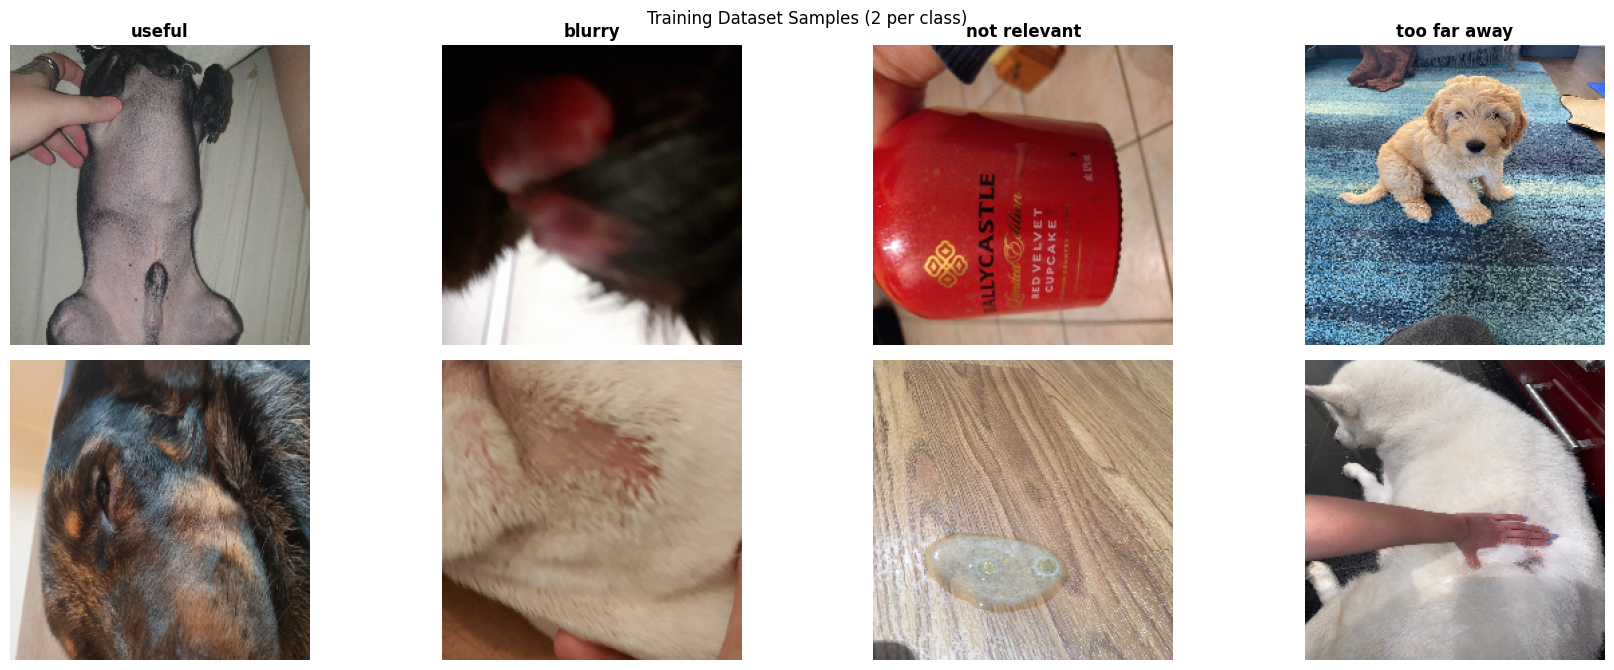

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from utils import load_config, load_and_process_csv

# ---- Config + Data ----
cfg = load_config()
df = load_and_process_csv(cfg['csv_path'])

# Filter only training split
train_df = df[df["Split"] == 0].copy()

# Label order
class_order = ['useful', 'blurry', 'not relevant', 'too far away']

def safe_imread_rgb(path, size=(224,224)):
    try:
        img = cv2.imread(path)
        if img is None:
            raise ValueError("cv2.imread failed")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, size)
    except Exception:
        img = np.zeros((*size,3), dtype=np.uint8)
        cv2.putText(img, "MISSING", (20, size[1]//2),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
    return img


samples = {cls: train_df[train_df["label"] == cls].sample(min(2, sum(train_df["label"]==cls)), random_state=42) 
           for cls in class_order}


fig, axes = plt.subplots(2, 4, figsize=(18, 7))
for col, cls in enumerate(class_order):
    subset = samples[cls].to_dict("records")
    # Title once on top of each column
    axes[0, col].set_title(cls, fontsize=12, fontweight="bold")
    for row in range(2):
        ax = axes[row, col]
        ax.axis("off")
        if row < len(subset):
            img_path = subset[row]["ImageFp"]
            img = safe_imread_rgb(img_path)
            ax.imshow(img)
        else:
            ax.imshow(np.ones((224,224,3), dtype=np.uint8)*200)
            ax.text(50, 110, "No sample", color="red")
plt.suptitle("Training Dataset Samples (2 per class)", fontsize=12, y=0.95)
plt.tight_layout()
plt.show()


In [14]:
df["label"].value_counts()

label
useful          45702
blurry           3941
not relevant     3079
too far away      315
Name: count, dtype: int64